In [1]:
# Importing all the required libraries #
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [2]:
# Loading the dataset from the csv file #
data = pd.read_csv('bank.csv',delimiter=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
# general info of the dataset #
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

There are no missing values in the data set

#### Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric) 

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [4]:
### Data transformation
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [5]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

After grouping, this is the columns

In [6]:
data['education'].unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

### Data preparation

Let's get a sense of the numbers across the two classes

The number of clients who subscribed to a term deposit: 451
The number of clients that did not buy a subscription: 3668


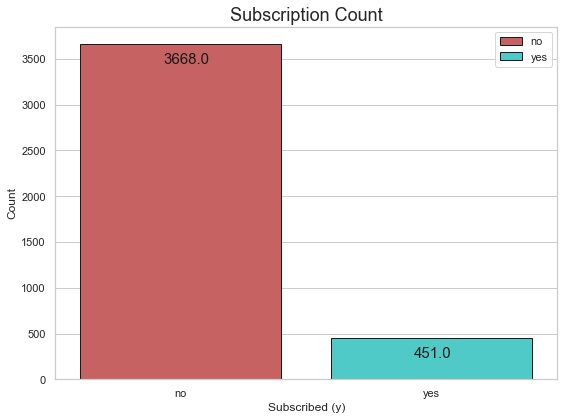

In [7]:
# The number of clients that subscribed and did not subscribe #

not_subscribed, subscribed = data.y.value_counts()
print(f'The number of clients who subscribed to a term deposit: \033[1m{subscribed}\033[0m')
print(f'The number of clients that did not buy a subscription: \033[1m{not_subscribed}\033[0m')

# Plotting the total number of clients that subscribed and did not subscribe #

plt.figure(figsize=(8,6))

ax = sns.countplot(data=data,x='y', palette={'no':'indianred','yes':'mediumturquoise'}, 
                   dodge=False,hue='y', alpha=1, edgecolor='k', saturation=0.9)

plt.title('Subscription Count', fontsize=18)
plt.xlabel('Subscribed (y)')
plt.ylabel('Count')
plt.legend(loc=1)

# Labeling the count number on the graph #
for p in ax.patches:
    x = p.get_bbox().get_points()[0,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(y, (x+0.33,y-250), ha='left', va='bottom', fontsize=15,c='k')

plt.tight_layout()
plt.show()

The ratio of **no:yes** in the output variable is roughly **8:1**, which indicates that the data is pretty imbalanced. Hence, the data needs to be resampled before applying the model.

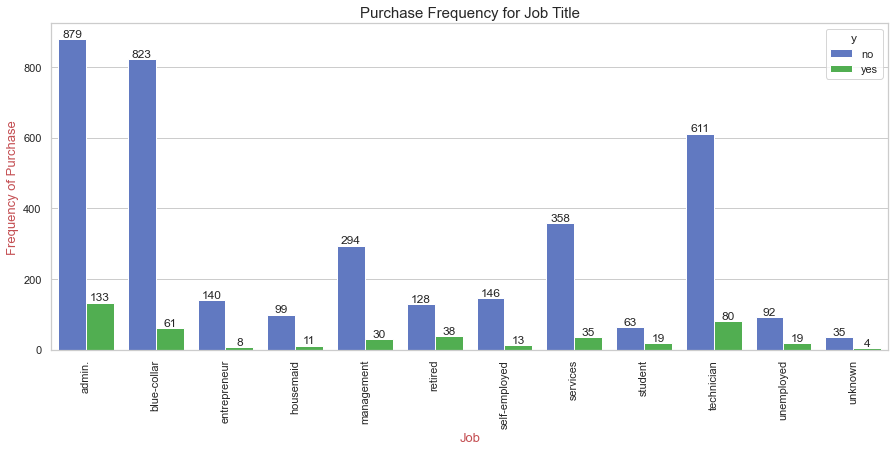

In [8]:
plt.figure(figsize=(15,6))

# Plotting the purchase frequency according to the jobs of the clients #
ax = sns.countplot(data=data,x='job',order=sorted(data.job.unique()),hue='y',
              palette={'no':'royalblue','yes':'limegreen'}, saturation=0.6)

plt.title('Purchase Frequency for Job Title', fontsize=15)
plt.xlabel('Job', fontsize=13, c='r')
plt.ylabel('Frequency of Purchase', fontsize=13, c='r')
plt.xticks(rotation=90)

# Labelling the count of clients over the respective bars #
g1 = data.groupby(['job','y'])['y'].size()
for i in range(len(g1)):
    abs_values = []
    abs_values = abs_values.append(g1.values[i])

ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.bar_label(container=ax.containers[1], labels=abs_values)


plt.show()

From the bar plot above, it looks like the clients with jobs in administration, technicians and blue-collar have the highest number of subscriptions, but they also contribute to the highest number of non-subscribers as well.

In [9]:
# Creating a new dataframe based on the education and number of yes's and no's of the output variable #
basic = data.loc[data.education=='Basic',:]['y'].value_counts()
high_school = data.loc[data.education=='high.school',:]['y'].value_counts()
illiterate = data.loc[data.education=='illiterate',:]['y'].value_counts()
pro_course = data.loc[data.education=='professional.course',:]['y'].value_counts()
uni_degree = data.loc[data.education=='university.degree',:]['y'].value_counts()
unknown = data.loc[data.education=='unknown',:]['y'].value_counts()

dfg = pd.DataFrame([basic,high_school,illiterate,pro_course,uni_degree,unknown])
dfg.index=['Basic', 'high.school','illiterate','professional.course', 'university.degree', 'unknown' ]

dfg


,no,yes
Basic,1133.0,98.0
high.school,824.0,97.0
illiterate,1.0,NaN
professional.course,470.0,65.0
university.degree,1099.0,165.0
unknown,141.0,26.0


In [10]:
# Filling the missing value with 0 #
dfg.yes.fillna(0,inplace=True)
dfg

,no,yes
Basic,1133.0,98.0
high.school,824.0,97.0
illiterate,1.0,0.0
professional.course,470.0,65.0
university.degree,1099.0,165.0
unknown,141.0,26.0


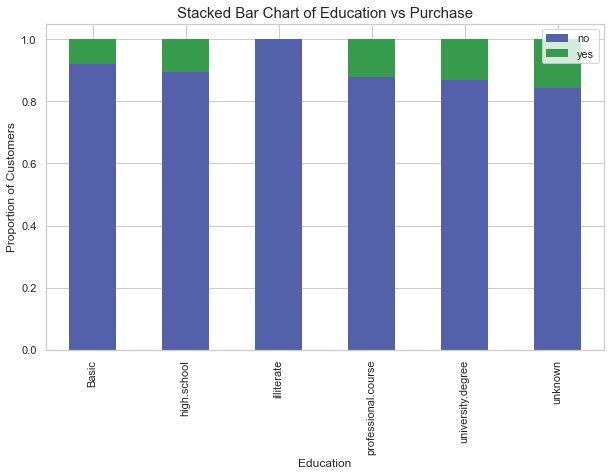

In [11]:
# Plotting the proportion of clients according to the education level #
ax = dfg.apply(lambda x:x/sum(x), axis=1).plot(kind='bar',stacked=True, figsize=(10,6), 
                                        color={'no':'#5261A9','yes':'#379B4E'},
                                        xlabel='Education', ylabel='Proportion of Customers',
                                        fontsize=11,linewidth=0)
ax.set_title(label='Stacked Bar Chart of Education vs Purchase',fontsize=15)

plt.show()

It seems like the unknown category has the highest proportion among the clients that purchased the term deposit according to education, followed by the clients with university degree/s closely followed by clients who took  professional course/s.

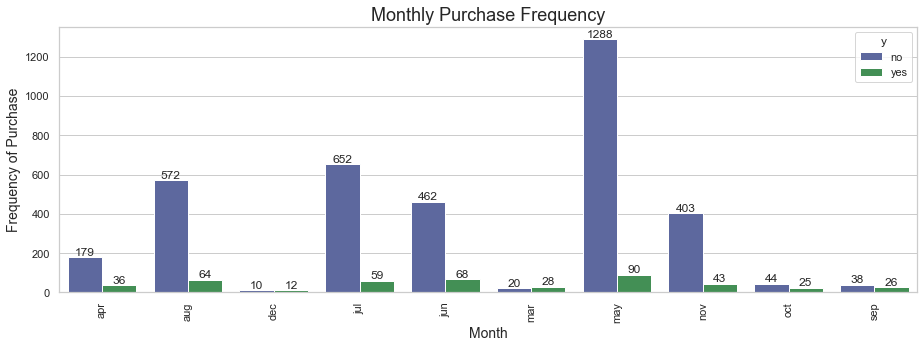

In [12]:
plt.figure(figsize=(13,5))

# Plotting the monthly purchase count #
ax = sns.countplot(data=data,x='month',hue='y', palette={'no':'#5261A9','yes':'#379B4E'},
              order=sorted(data.month.unique()))

# Annotating the count values over the bars on the graph #
g1 = data.groupby(['month','y'])['y'].size()
for i in range(len(g1)):
    abs_values = []
    abs_values = abs_values.append(g1.values[i])

ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.bar_label(container=ax.containers[1], labels=abs_values)

# Plot parameters #
plt.title('Monthly Purchase Frequency', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Frequency of Purchase', fontsize=14)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

The plot above shows the monthly purchase frequency of the clients. We can see that in the months of March and December, the number of clients that purchased the term deposit is higher than the ones who didn't. And in the months of October and September, even though the number of non-purchasing customers is higher, there isnt much difference between the number of clients that purchased and those who didn't when compared to the rest of the months, where there is a large diffrerence in those numbers.

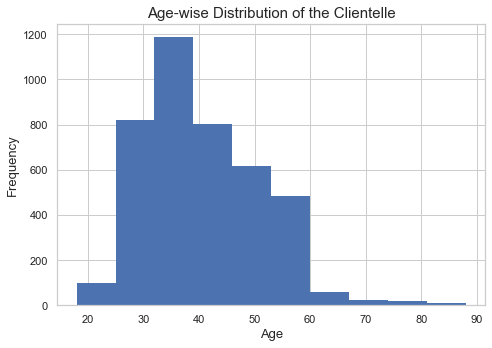

In [13]:
# Plotting the histogram for the age column to see its distribution #

plt.figure(figsize=(7,5))

plt.hist(data.age, linewidth=0)
plt.title('Age-wise Distribution of the Clientelle', fontsize=15)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Frequency', fontsize=13)

plt.tight_layout()
plt.show()

Ages between 25 to 45 seem to make up most of the clients for the bank.

In [14]:
# Statistical description of the categorical variables #
data.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,6,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


In [15]:
# Converting the output variable values, i.e, 'no' and 'yes' to binary values, i.e, 0 and 1 respectively #

y_dict = {'no':0,'yes':1}

data.y = data.y.map(y_dict)

data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,Basic,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [16]:
# relocating the y column to the 0th position #
y_col = data.pop('y')
data.insert(0,'y',y_col)
data.head()

,y,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,30,blue-collar,married,Basic,no,yes,no,cellular,may,...,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,0,39,services,single,high.school,no,no,no,telephone,may,...,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,0,25,services,married,high.school,no,yes,no,telephone,jun,...,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,0,38,services,married,Basic,no,unknown,unknown,telephone,jun,...,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,0,47,admin.,married,university.degree,no,yes,no,cellular,nov,...,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [17]:
## Write code to convert following columns to equivalent dummy variables

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

# Using get dummies to create dummy variables #
df = pd.get_dummies(data, columns=cat_vars)

df.head()

,y,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,...,0,0,1,0,0,0,0,0,1,0
1,0,39,346,4,999,0,1.1,93.994,-36.4,4.855,...,0,0,1,0,0,0,0,0,1,0
2,0,25,227,1,999,0,1.4,94.465,-41.8,4.962,...,0,0,0,0,0,0,1,0,1,0
3,0,38,17,3,999,0,1.4,94.465,-41.8,4.959,...,0,0,1,0,0,0,0,0,1,0
4,0,47,58,1,999,0,-0.1,93.200,-42.0,4.191,...,0,0,0,1,0,0,0,0,1,0


### *Resampling*

*Since the data is imbalanced, choosing upsampling since it usually gives better results compared to down-sampling which may lead to loss of imporatant data.*

In [18]:
y0,y1 = df.y.value_counts()
y0,y1

(3668, 451)

In [84]:
# Creating 2 separate datasets with unique values of the output variable 'y' #
df_0 = df[df['y']==0]
df_1 = df[df['y']==1]

Random over-sampling:
1    3668
0    3668
Name: y, dtype: int64


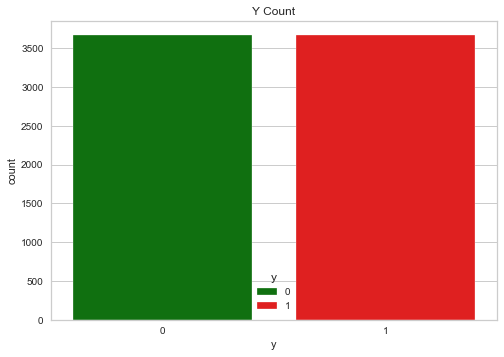

In [85]:
# Upsampling the Class 1 rows by selecting the same number of rows as that of Class 0 #
df_over = df_1.sample(y0, replace=True)

# Concatenating the 2 datsets, i.e, dataset with Class 0 and the over-sampled dataset of Class 1 into a single dataset #
df_over = pd.concat([df_over, df_0], axis=0)

print('Random over-sampling:')
print(df_over.y.value_counts())

sns.countplot(data=df_over,x='y',palette={0:'green', 1:'red'},hue='y',dodge=False).set(title='Y Count')
plt.show()

In [86]:
df_over

,y,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
2957,1,43,1806,4,999,0,1.4,93.918,-42.7,4.957,...,0,0,0,0,0,0,1,0,1,0
2949,1,31,590,3,999,0,1.4,94.465,-41.8,4.866,...,0,0,0,0,1,0,0,0,1,0
150,1,82,279,3,3,2,-1.1,94.199,-37.5,0.877,...,0,1,0,0,0,1,0,0,0,1
3633,1,68,418,2,999,0,-3.4,92.431,-26.9,0.728,...,1,0,0,0,0,1,0,0,1,0
2018,1,57,473,1,3,5,-1.1,94.199,-37.5,0.877,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0,30,53,1,999,0,1.4,93.918,-42.7,4.958,...,0,0,0,0,1,0,0,0,1,0
4115,0,39,219,1,999,0,1.4,93.918,-42.7,4.959,...,0,0,1,0,0,0,0,0,1,0
4116,0,27,64,2,999,1,-1.8,92.893,-46.2,1.354,...,0,0,0,1,0,0,0,1,0,0
4117,0,58,528,1,999,0,1.4,93.444,-36.1,4.966,...,0,0,1,0,0,0,0,0,1,0


In [87]:
#  Separating the features and label #
X = df_over.drop(['y'],axis=1)
y = df_over.y

### Feature Selection

In [90]:
# Using the bidirectional feature selection using the sequential feature selector #
from mlxtend.feature_selection import SequentialFeatureSelector

# Instantiating the feature selector #
bfs = SequentialFeatureSelector(LogisticRegression(),
                                k_features=(5,15),
                                floating=False,
                               forward = True,
                               scoring = 'f1',
                               cv = 2,n_jobs=-1)

bfs = bfs.fit(X,y)

sel_feat = X.columns[list(bfs.k_feature_idx_)]

# Selected features #
print(f'Selected Features: \n {sel_feat}')

X = bfs.transform(X)

Selected Features: 
 Index(['duration', 'campaign', 'pdays', 'emp.var.rate', 'euribor3m',
       'job_blue-collar', 'job_retired', 'job_student', 'job_technician',
       'education_high.school', 'month_apr', 'month_mar', 'month_may',
       'day_of_week_tue', 'day_of_week_wed'],
      dtype='object')


In [91]:
X.shape

(7336, 15)

### Implementing the model

### Logistic Regression Model Fitting

In [93]:
# Splitting the data into train and test sets with a test size of 30% #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

# Feature Scaling #
# importing the standard scaler to make the mean 0 and stadndard deviation 1 #
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Fitting the train and test data in the standard scaler #
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Importing the logistic regression model #
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

# Fitting the training data in the model #
logr.fit(X_train, y_train)

# Predicting the label in the test set #
y_pred = logr.predict(X_test)

### Confusion Matrix

Confusion matrix:
[[945 156]
 [124 976]]



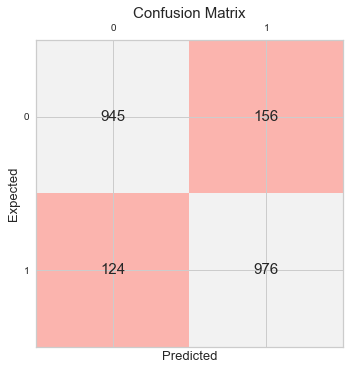

In [95]:
# Importing different model evaluation parameters #
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Displaying the confusion matrix #
cm = confusion_matrix(y_test, y_pred)

print(f'\033[1mConfusion matrix\033[0m:\n{cm}\n')

# Visualizing the Confusion matrix #

labels = ['0','1']

plt.matshow(cm, cmap=plt.cm.Pastel1)
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center', fontsize=15)


plt.xlabel('Predicted',fontsize=13)
plt.ylabel('Expected',fontsize=13)
plt.title('Confusion Matrix',fontsize=15)

plt.show()

### ROC/AUC

In [97]:
# Defining a function to plot the ROC curve #

from sklearn.metrics import roc_curve, auc, roc_auc_score

def plotRocAuc(model, X, y):

    probabilities = model.predict_proba(X)
    probabilities = probabilities[:, 1] # keep probabilities for first class only

 # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y, probabilities)

 # Plot the "dumb model" line
    plt.plot([0, 1], [0, 1], linestyle='--')

 # Plot the model line
    plt.plot(fpr, tpr, marker='.')
    plt.text(0.75, 0.25, "AUC: " + str(round(roc_auc_score(y, probabilities),2)))
    
# show the plot
    plt.show()

# printing the value of area under the curve #
    print(f'\033[1mArea under the curve = {round(roc_auc_score(y, probabilities),2)*100}%\033[0m')

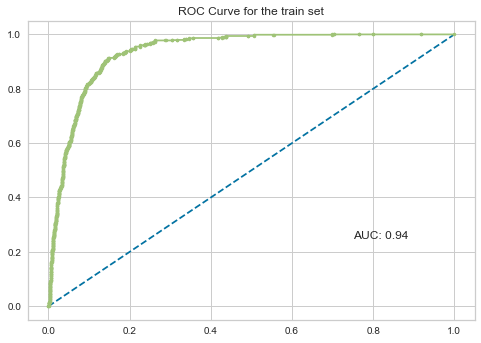

Area under the curve = 94.0%


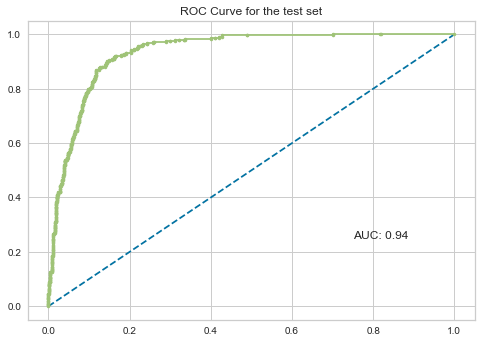

Area under the curve = 94.0%


In [98]:
# Plotting the ROC curve for the training data
plt.title('ROC Curve for the train set')
plotRocAuc(logr, X_train, y_train)

# Plotting the ROC curve for the test data
plt.title('ROC Curve for the test set')
plotRocAuc(logr, X_test, y_test)

In [100]:
# Classification report of the model #
class_rep = classification_report(y_test,y_pred)

print(f'\033[1mClassification Report:\n{class_rep}\033[0m')

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1101
           1       0.86      0.89      0.87      1100

    accuracy                           0.87      2201
   macro avg       0.87      0.87      0.87      2201
weighted avg       0.87      0.87      0.87      2201



### Accuracy

In [102]:
# Accuracy score of the model #
accuracy = accuracy_score(y_test, y_pred)
print(f'\033[1mAccuracy of the model: {accuracy} ({round(accuracy*100,2)}%)\033[0m')

Accuracy of the model: 0.8727850976828714 (87.28%)


### Cross-validation

In [104]:
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(LogisticRegression(max_iter=10000), X, y, cv=10, n_jobs=-1)

print(f'Cross Validation Score:\n{cross_score}')

print(f'Mean accuracy of the model is {cross_score.mean()} with a standard deviation of {cross_score.std()}')

Cross Validation Score:
[0.8760218  0.89782016 0.90599455 0.88283379 0.8746594  0.88555858
 0.85129604 0.88540246 0.87585266 0.87039563]
Mean accuracy of the model is 0.8805835077376019 with a standard deviation of 0.0142677757753146


### Model Tuning

In [106]:
# Importing the grid search model for hyperparameter selection #
from sklearn.model_selection import GridSearchCV

# Defining the parameters #
parameters = [{'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter':[200,250,300,400,500], 'tol':[0.01,0.001,0.0001]}]

# Instantiating the gridsearchcv #
grid_search = GridSearchCV(estimator = logr,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)

grid_search.fit(X_train,y_train)

# Predicting the label values directly from the grod search #
y_pred_grid = grid_search.best_estimator_.predict(X_test)

best_accuracy = grid_search.best_score_
best_param = grid_search.best_params_

print(f'Best Accuracy: {best_accuracy}')
print(f'Best Parameters: {best_param}')


Best Accuracy: 0.8812074001947419
Best Parameters: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.001}


In [108]:
# Importing the logistic regression model #
from sklearn.linear_model import LogisticRegression

# Instantiating the model with the best parameter resulting from the hyperparameter tuning #
logr_new = LogisticRegression(C=best_param['C'], max_iter=best_param['max_iter'], 
                              tol=best_param['tol'], solver=best_param['solver'],
                              penalty=best_param['penalty'])

# Fitting the training data in the tuned model #
logr_new.fit(X_train, y_train)

# Predicting the label in the test set with the tuned model #
y_pred_new = logr_new.predict(X_test)

# Accuracy score of the tuned model #

# Accuracy of the prediction from the tuned model #
accuracy_new = accuracy_score(y_test, y_pred_new)
print(f'\033[1mAccuracy of the tuned model: {accuracy_new} ({round(accuracy_new*100,2)}%)\033[0m\n')

# Accuracy of the prediction from the grid search CV #
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f'\033[1mBest accuracy of the tuned model: {accuracy_grid} ({round(accuracy_grid*100,2)}%)\033[0m\n')

# Accuracy of the untuned model #
print(f'\033[1mAccuracy of the untuned model: {accuracy} ({round(accuracy*100,2)}%)\033[0m')

Accuracy of the tuned model: 0.874602453430259 (87.46%)

Best accuracy of the tuned model: 0.874602453430259 (87.46%)

Accuracy of the untuned model: 0.8727850976828714 (87.28%)


*We can see that there is a very small increase (~ 0.18%) in the accuracy value after tuning the logistic regression model, which may not be much, but it is still an improvement.*

## *Thank You*